# Data Mining Assignment 2
Dataset from kaggle :https://www.kaggle.com/ninzaami/loan-predication The moto is to prredict wheter the person will get the loan or not based on all the other features.

First data is cleaned

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# importing or loading the dataset 
data = pd.read_csv('./bank-loan2 (1)/madfhantr.csv') 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [58]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', 0], dtype=object)

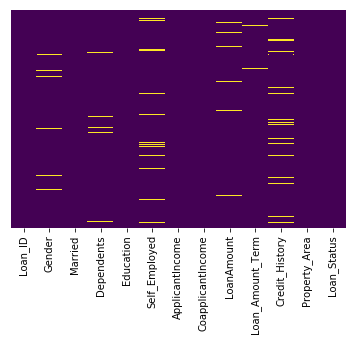

In [4]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [59]:
#Converting NOminal data to Integer

#If dependendents =3+
data.loc[data['Dependents'] =="3+", 'Dependents'] = 3

#Gender if male =0 else 1
data.loc[data['Gender'] =="Male", 'Gender'] = 0
data.loc[data['Gender'] =="Female", 'Gender'] = 1

#Married with 0, not married =1 if NUll 0
data.loc[data['Married'] =="Yes", 'Married'] = 0
data.loc[data['Married'] =="No", 'Married'] = 1

#Graduate with 0, Not Graduate =1
data.loc[data['Education'] =="Graduate", 'Education'] = 0
data.loc[data['Education'] =="Not Graduate", 'Education'] = 1

#SElf emplyed with 0, Not self employed =1
data.loc[data['Self_Employed'] =="Yes", 'Self_Employed'] = 0
data.loc[data['Self_Employed'] =="No", 'Self_Employed'] = 1

#Urban with 0,semiurban =1 rural=2
data.loc[data['Property_Area'] =="Urban", 'Property_Area'] = 0
data.loc[data['Property_Area'] =="Semiurban", 'Property_Area'] = 1
data.loc[data['Property_Area'] =="Rural", 'Property_Area'] = 2

#Output is Loan Status Y=1,N=0
data.loc[data['Loan_Status'] =="Y", 'Loan_Status'] = 1
data.loc[data['Loan_Status'] =="N", 'Loan_Status'] = 0


/home/ishdutt/anaconda3/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [60]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,1,0,0,1,5849,0.0,146.0,360.0,1.0,0,1
1,LP001003,0,0,1,0,1,4583,1508.0,128.0,360.0,1.0,2,0
2,LP001005,0,0,0,0,0,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,0,0,0,1,1,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,0,1,0,0,1,6000,0.0,141.0,360.0,1.0,0,1


In [61]:
#Dealing With Null values
data.loc[pd.isnull(data['Gender']), 'Gender'] = 0
data.loc[pd.isnull(data['Married']), 'Married'] = 0
data.loc[pd.isnull(data['Dependents']),'Dependents']=0
data.loc[pd.isnull(data['Self_Employed']),'Self_Employed']=1
data.loc[pd.isnull(data['LoanAmount']),'LoanAmount']=146
data.loc[pd.isnull(data['Credit_History']),'Credit_History']=1
data.loc[pd.isnull(data['Loan_Amount_Term']),'Loan_Amount_Term']=342

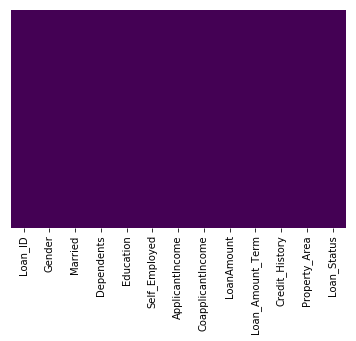

In [62]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

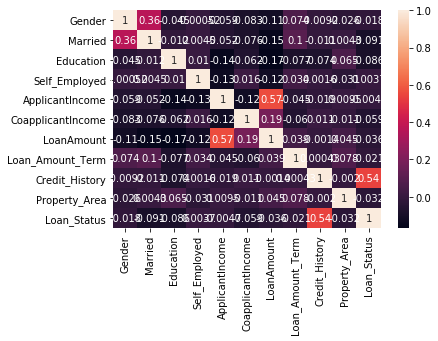

In [116]:
sns.heatmap(data.corr(), annot=True)

## Data Cleaning  Done

## Now Classfication using different algorithm
 1. Decision Tree implementation to predict the status of loan
 2. Naive Bayes Classifier
 3. SVM implementation
 4. Neural Network Classifier
 5. KNN Classifier

In [63]:
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [77]:
from sklearn.metrics import classification_report

In [64]:
X = data.drop(['Loan_Status','Loan_ID'],axis=1)
y = data['Loan_Status']

In [65]:
X[0:8].head(100)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,0,1,5849,0.0,146.0,360.0,1.0,0
1,0,0,1,0,1,4583,1508.0,128.0,360.0,1.0,2
2,0,0,0,0,0,3000,0.0,66.0,360.0,1.0,0
3,0,0,0,1,1,2583,2358.0,120.0,360.0,1.0,0
4,0,1,0,0,1,6000,0.0,141.0,360.0,1.0,0
5,0,0,2,0,0,5417,4196.0,267.0,360.0,1.0,0
6,0,0,0,1,1,2333,1516.0,95.0,360.0,1.0,0
7,0,0,3,0,1,3036,2504.0,158.0,360.0,0.0,1


In [66]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [67]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

### 1. Decision Tree Implementation

In [68]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

In [72]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [73]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7405405405405405


In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.44      0.57        61
           1       0.78      0.95      0.86       124

    accuracy                           0.78       185
   macro avg       0.80      0.70      0.71       185
weighted avg       0.79      0.78      0.76       185



## 2.Naive Bayes Classifier

In [74]:
from sklearn.naive_bayes import GaussianNB # Import Naive bayes Classifier

In [81]:
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
  
# making predictions on the testing set 
y_pred = gnb.predict(X_test) 

In [82]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7837837837837838


In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.44      0.57        61
           1       0.78      0.95      0.86       124

    accuracy                           0.78       185
   macro avg       0.80      0.70      0.71       185
weighted avg       0.79      0.78      0.76       185



## 3. Support Vector Machine

In [85]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [86]:
predictions = model.predict(X_test)

In [89]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.6702702702702703


In [87]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.50      0.02      0.03        61
           1       0.67      0.99      0.80       124

    accuracy                           0.67       185
   macro avg       0.59      0.50      0.42       185
weighted avg       0.62      0.67      0.55       185



In [90]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [93]:
# May take awhile!
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.698, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.698, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.698, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.686, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.694, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.698, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.698, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.698, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.686, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.694, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.698, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.698, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.698, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.698, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.698, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.698, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.686, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.694, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.698, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.698, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [94]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [95]:
grid.best_estimator_

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [96]:
grid_predictions = grid.predict(X_test)

In [97]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.67      1.00      0.80       124

    accuracy                           0.67       185
   macro avg       0.34      0.50      0.40       185
weighted avg       0.45      0.67      0.54       185



/home/ishdutt/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ishdutt/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ishdutt/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [109]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.6702702702702703


## 4. KNN Classifier 

In [106]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [107]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.21      0.05      0.08        61
           1       0.66      0.91      0.77       124

    accuracy                           0.63       185
   macro avg       0.44      0.48      0.42       185
weighted avg       0.51      0.63      0.54       185



In [104]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

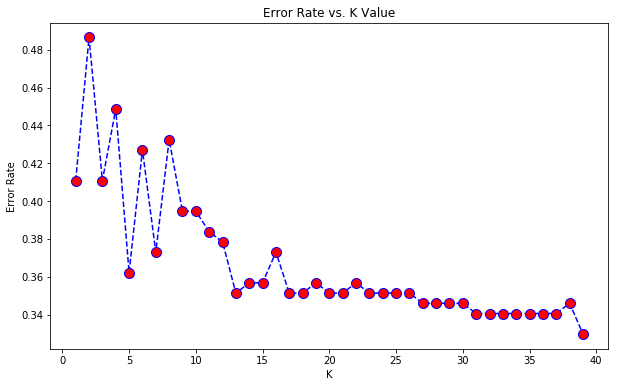

In [105]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [110]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print("Accuracy:",metrics.accuracy_score(y_test, pred))
print('\n')

WITH K=1


Accuracy: 0.5891891891891892




In [112]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=39
knn = KNeighborsClassifier(n_neighbors=39)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print("Accuracy:",metrics.accuracy_score(y_test, pred))
print('\n')

WITH K=1


Accuracy: 0.6702702702702703




## 5.Neural Classifier

In [118]:
from keras import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [122]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=11))
#Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [123]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [124]:
#Fitting the data to the training dataset
classifier.fit(X_train,y_train, batch_size=10, epochs=100)

Epoch 1/100
429/429 [==============================] - 2s 6ms/step - loss: 0.6634 - accuracy: 0.6760
Epoch 2/100
429/429 [==============================] - 0s 138us/step - loss: 0.6549 - accuracy: 0.6946
Epoch 3/100
429/429 [==============================] - 0s 147us/step - loss: 0.6489 - accuracy: 0.6946
Epoch 4/100
429/429 [==============================] - 0s 122us/step - loss: 0.6438 - accuracy: 0.6946
Epoch 5/100
429/429 [==============================] - 0s 155us/step - loss: 0.6444 - accuracy: 0.6946
Epoch 6/100
429/429 [==============================] - 0s 158us/step - loss: 0.6388 - accuracy: 0.6946
Epoch 7/100
429/429 [==============================] - 0s 163us/step - loss: 0.6301 - accuracy: 0.6946
Epoch 8/100
429/429 [==============================] - 0s 140us/step - loss: 0.6274 - accuracy: 0.6946
Epoch 9/100
429/429 [==============================] - 0s 160us/step - loss: 0.6240 - accuracy: 0.6946
Epoch 10/100
429/429 [==============================] - 0s 137us/step - los

429/429 [==============================] - 0s 141us/step - loss: 0.6149 - accuracy: 0.6946
Epoch 80/100
429/429 [==============================] - 0s 126us/step - loss: 0.6148 - accuracy: 0.6946
Epoch 81/100
429/429 [==============================] - 0s 142us/step - loss: 0.6157 - accuracy: 0.6946
Epoch 82/100
429/429 [==============================] - 0s 118us/step - loss: 0.6163 - accuracy: 0.6946
Epoch 83/100
429/429 [==============================] - 0s 129us/step - loss: 0.6187 - accuracy: 0.6946
Epoch 84/100
429/429 [==============================] - 0s 131us/step - loss: 0.6199 - accuracy: 0.6946
Epoch 85/100
429/429 [==============================] - 0s 116us/step - loss: 0.6192 - accuracy: 0.6946
Epoch 86/100
429/429 [==============================] - 0s 118us/step - loss: 0.6151 - accuracy: 0.6946
Epoch 87/100
429/429 [==============================] - 0s 133us/step - loss: 0.6150 - accuracy: 0.6946
Epoch 88/100
429/429 [==============================] - 0s 132us/step - loss:

In [125]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

429/429 [==============================] - 0s 255us/step


[0.6103417602452365, 0.6946386694908142]

In [126]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

In [127]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  0  61]
 [  0 124]]


In [128]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6702702702702703
